In [78]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler, MinMaxScaler
from sklearn.preprocessing import FunctionTransformer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.linear_model import LinearRegression, LogisticRegression
import statsmodels.api as sm
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import (
    BaggingClassifier, 
    RandomForestClassifier, 
    ExtraTreesClassifier, 
    AdaBoostClassifier,
    StackingClassifier,
    GradientBoostingClassifier,
    HistGradientBoostingClassifier
)

# to do PCA 
from sklearn.decomposition import PCA

# for cross validation
from sklearn.model_selection import cross_val_score, StratifiedKFold, KFold

import sklearn.metrics as metrics
from sklearn.metrics import (
    mean_absolute_error,
    mean_squared_error,
    r2_score,
    classification_report,
    confusion_matrix,
    ConfusionMatrixDisplay,
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    roc_auc_score,
    precision_recall_curve,
    roc_curve,
)

from lightgbm import LGBMClassifier
from xgboost import XGBClassifier

from sklearn.model_selection import cross_val_score, cross_validate, cross_val_predict
# To tune a model
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import set_config

set_config(display='diagram')

from joblib import dump
from joblib import load

In [79]:
df = pd.read_csv('rapamycinTrain.tsv', sep='\t')

In [80]:
df.head()

,Rapamycin_response,type,mut_C1orf222,mut_CAMTA1,mut_H6PD,mut_SPEN,mut_HSPG2,mut_ARID1A,mut_ZSCAN20,mut_CSMD2,...,rna_MAFIP,rna_CD24,rna_HLA-DRB3,rna_LOC389831,rna_MGC70870,rna_LOC100233156,rna_LOC389834,rna_LOC283788,rna_RNA5-8S5,rna_LOC102723780
Breast_SQ68,1,Breast,0,0,0,0,0,0,1,0,...,1.765641,3.610263,0.000000,0.144895,0.109381,0.000000,0.377070,0.743830,7.430427,0.379076
Breast_EI813,1,Breast,0,0,0,0,0,0,0,0,...,0.683720,1.901263,0.000000,1.973497,0.560144,0.763473,0.508316,1.166169,9.509599,1.445901
Breast_PV9,1,Breast,0,0,0,0,1,0,1,0,...,2.985080,4.125750,0.160901,1.316661,0.265797,1.167377,1.316250,1.320358,7.672418,0.230426
Breast_KY76,0,Breast,0,0,0,0,0,0,0,0,...,0.442882,0.320471,0.077141,3.301013,0.063881,0.323250,0.515944,0.272920,4.727648,0.222489
Breast_EPQV2,1,Breast,0,0,0,1,0,1,0,0,...,3.361561,7.317910,0.071225,2.624524,0.108735,1.402040,1.296005,1.550906,10.491553,2.474496


In [81]:
df.columns = df.columns.str.replace('.', '-')

C:\Users\madhu\AppData\Local\Temp/ipykernel_10420/2875486294.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df.columns = df.columns.str.replace('.', '-')


In [82]:
df = pd.get_dummies(df, columns=['type'], drop_first=True)
df.head()

,Rapamycin_response,mut_C1orf222,mut_CAMTA1,mut_H6PD,mut_SPEN,mut_HSPG2,mut_ARID1A,mut_ZSCAN20,mut_CSMD2,mut_MACF1,...,rna_RNA5-8S5,rna_LOC102723780,type_Bowel,type_BrainCNS,type_Breast,type_Kidney,type_Lung,type_Ovary,type_Prostate,type_Skin
Breast_SQ68,1,0,0,0,0,0,0,1,0,0,...,7.430427,0.379076,0,0,1,0,0,0,0,0
Breast_EI813,1,0,0,0,0,0,0,0,0,0,...,9.509599,1.445901,0,0,1,0,0,0,0,0
Breast_PV9,1,0,0,0,0,1,0,1,0,0,...,7.672418,0.230426,0,0,1,0,0,0,0,0
Breast_KY76,0,0,0,0,0,0,0,0,0,0,...,4.727648,0.222489,0,0,1,0,0,0,0,0
Breast_EPQV2,1,0,0,0,1,0,1,0,0,0,...,10.491553,2.474496,0,0,1,0,0,0,0,0


In [83]:
# variances = df.var()

# # Get column indices where variance is zero
# zero_variance_cols = variances[variances == 0].index

In [84]:
# # Drop columns with zero variance
# df = df.drop(columns=zero_variance_cols)
# df.shape

# SPLITTING 

In [85]:
X = df.drop('Rapamycin_response', axis = 1)
y = df['Rapamycin_response']

In [86]:
y.value_counts()

1    25
0    23
Name: Rapamycin_response, dtype: int64

In [87]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=4, stratify = y)
print("Number of rows in train data =", X_train.shape[0])
print("Number of rows in test data =", X_test.shape[0])

Number of rows in train data = 38
Number of rows in test data = 10


In [88]:
y_test.value_counts()

0    5
1    5
Name: Rapamycin_response, dtype: int64

# SCALING

In [89]:
scaler = MinMaxScaler()
 
# Scale the Data
X_train = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)
X_test = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns)

# OVER-SAMPLING

In [90]:
# Assign y_train as a new column to X_train DataFrame
X_train['TargetColumn'] = y_train.values

In [91]:
#weights = [10 if TargetColumn > 0.5 else 1 for TargetColumn in X_train.TargetColumn] #weights not needed since random sampling
sample = X_train.sample(700, replace = True)
sample.head()

,mut_C1orf222,mut_CAMTA1,mut_H6PD,mut_SPEN,mut_HSPG2,mut_ARID1A,mut_ZSCAN20,mut_CSMD2,mut_MACF1,mut_CDCP2,...,rna_LOC102723780,type_Bowel,type_BrainCNS,type_Breast,type_Kidney,type_Lung,type_Ovary,type_Prostate,type_Skin,TargetColumn
15,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.046367,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
24,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.153193,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1
22,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.459373,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0
29,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.455801,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
34,1.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,...,0.294494,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0


In [92]:
sample['TargetColumn'].value_counts()

1    366
0    334
Name: TargetColumn, dtype: int64

In [93]:
# Oversample the minority class by duplicating samples
oversampled = pd.concat([X_train, sample], axis=0, ignore_index=True)
oversampled.shape

(738, 15997)

In [94]:
# Shuffle the DataFrame using sample() method
shuffled_df = oversampled.sample(frac=1, random_state=42)  # frac=1 shuffles all rows, random_state for reproducibility

# Reset the index if needed
shuffled_df.reset_index(drop=True, inplace=True)

In [95]:
X_train = shuffled_df.drop('TargetColumn', axis = 1)
y_train = shuffled_df['TargetColumn'].values

# MODELLING PART

# Lasso Logistic Regression

In [96]:
# Create a Logistic Regression model with L1 (Lasso) regularization
lasso_logreg = LogisticRegression(penalty='l1', solver='liblinear', C=70.0, random_state=42)  # Adjust C for regularization strength

# Fit the model on the training data
lasso_logreg.fit(X_train, y_train)

# Save the trained model to a file
dump(lasso_logreg, 'repa_lasso.joblib')

# Predict on the test set
y_pred = lasso_logreg.predict(X_test)

y_pred_train = lasso_logreg.predict(X_train)
print("Accuracy on train:", accuracy_score(y_train, y_pred_train))
# Calculate accuracy on the test set
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy on train: 1.0
Accuracy: 0.8


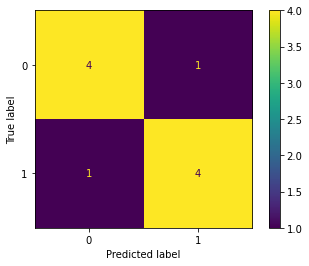

In [97]:
ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred)).plot()

In [98]:
# Retrieve coefficients and intercept
coefficients = lasso_logreg.coef_
intercept = lasso_logreg.intercept_

print("Coefficients:", coefficients)
print("Intercept:", intercept)

Coefficients: [[0. 0. 0. ... 0. 0. 0.]]
Intercept: [0.]


In [99]:
# Retrieve coefficients greater than zero and their column indices
coefficients = lasso_logreg.coef_[0]  # Assuming binary classification, extracting coefficients for the first class

non_zero_coefficients = [(index, coef) for index, coef in enumerate(coefficients) if coef != 0]

sorted_coefficients = sorted(non_zero_coefficients, key=lambda x: abs(x[1]), reverse=True)

print("Coefficients:")
for index, coef in sorted_coefficients:
    print(f"{X_train.columns[index]}: {coef}")

Coefficients:
rna_SNORA74A: 1.2577139387761695
rna_CTNND2: -1.0287156425015658
mut_TNKS1BP1: -0.9709553266605897
mut_FAT4: -0.9545732649087979
rna_FMOD: 0.917117357978318
mut_KCNH5: -0.9120944963360609
rna_CHRNA7: -0.8995478109185548
mut_KCTD19: -0.8976547802682174
rna_AMOT: -0.8635536028983707
rna_CNNM1: -0.8622523142098621
rna_RNF175: -0.8446809543105344
rna_MARCH10: -0.8374790570034487
rna_AMH: 0.7918652734773868
rna_COL6A3: 0.7687291771656523
rna_BLNK: 0.7620428605048893
rna_TP73: -0.7619983241406254
mut_SACS: -0.7472207702675507
rna_PPP1R14C: -0.7438392296306795
rna_CHRFAM7A: -0.7392681021011467
rna_LOC102723769: 0.6712254588066042
rna_LOC283788: 0.670607685268252
rna_OPN3: 0.6603645101453264
mut_MYH2: -0.6521969598493165
rna_EPB41L3: -0.6467941937903864
rna_CDC37L1-AS1: -0.6268900300725938
rna_HS6ST2: -0.6194487978561906
rna_TNIK: -0.6013372030885055
rna_PREX2: 0.5998126719295989
rna_SFTA1P: -0.5783202515918079
rna_ANKRD22: -0.5755527900599225
rna_XAGE1E: -0.5734843743021498
mut_

In [100]:
cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=4)
cross_val_score(lasso_logreg, X_train, y_train, cv=cv, scoring='accuracy',)

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [101]:
#using laeve one out cross validation
#cv = KFold(n_splits=38, shuffle=True, random_state=4)
#cross_val_score(lasso_logreg, X_train, y_train, cv=cv, scoring='accuracy',)

In [102]:
columns = []
for index, coef in non_zero_coefficients:
    columns.append(X_train.columns[index])

columns

['mut_RHBG',
 'mut_SPTA1',
 'mut_USH2A',
 'mut_IL1R2',
 'mut_LRP1B',
 'mut_COL6A3',
 'mut_COL7A1',
 'mut_RETNLB',
 'mut_WWTR1',
 'mut_FAT4',
 'mut_PCDH10',
 'mut_CTNND2',
 'mut_NIPBL',
 'mut_ADAMTS19',
 'mut_PPP1R3A',
 'mut_PLXNA4',
 'mut_RIMS2',
 'mut_TG',
 'mut_CCDC7',
 'mut_PCDH15',
 'mut_KAT6B',
 'mut_SORCS3',
 'mut_ATRNL1',
 'mut_OR5L2',
 'mut_TNKS1BP1',
 'mut_SORL1',
 'mut_LRRIQ1',
 'mut_KDM2B',
 'mut_SACS',
 'mut_KCNH5',
 'mut_KCTD19',
 'mut_MYH1',
 'mut_MYH2',
 'mut_DNAH9',
 'mut_ZNF335',
 'mut_KCNQ2',
 'rna_TP73',
 'rna_AJAP1',
 'rna_EXOSC10',
 'rna_MTHFR',
 'rna_TMEM51',
 'rna_RSC1A1',
 'rna_MINOS1-NBL1',
 'rna_RPL11',
 'rna_RCAN3',
 'rna_TMEM57',
 'rna_SPOCD1',
 'rna_ZBTB8OS',
 'rna_GJB3',
 'rna_STIL',
 'rna_MCOLN2',
 'rna_FNBP1L',
 'rna_LOC729970',
 'rna_RNPC3',
 'rna_CD58',
 'rna_GDAP2',
 'rna_WARS2',
 'rna_LOC101929147',
 'rna_LOC102723769',
 'rna_BCL9',
 'rna_FAM231D',
 'rna_LOC653513',
 'rna_PDE4DIP',
 'rna_ANKRD34A',
 'rna_CIART',
 'rna_CERS2',
 'rna_CDC42SE1',
 'rna_L

In [103]:
len(columns)

600

In [104]:
strings_to_check = ['type_Breast', 'type_BrainCNS', 'type_Bowel', 'type_Blood', 'type_Skin', 'type_Lung', 'type_Ovary', 'type_Prostate', 'type_Kidney']
present_strings = [string for string in strings_to_check if any(string in name for name in columns)]

# Print the result
print("Strings present in the array names:", present_strings)

Strings present in the array names: []
